This notebook plots the solutions. You can actually plot the progress while the solver is running to see if it makes sense.

In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys, os
sys.path.insert(0, '../source')
import numpy as np
from matplotlib.tri import Triangulation
import matplotlib.pyplot as plt
from params import rho_i,g
from scipy.interpolate import griddata
from matplotlib.path import Path

In [2]:
#choose which results to load
results_name = '../results/example'

t = np.load(results_name+'/t.npy')
nodes_x = np.load(results_name+'/nodes_x.npy')
nodes_z = np.load(results_name+'/nodes_z.npy')
dofmap = np.load(results_name+'/dofmap.npy')


In [3]:
# load results and reorder dof's to the serial ordering
u = np.load(results_name+'/u.npy')
w = np.load(results_name+'/w.npy')
p = np.load(results_name+'/p.npy')

h = np.load(results_name+'/h.npy')
s = np.load(results_name+'/s.npy')
x = np.load(results_name+'/x.npy')

In [4]:
H0 = np.mean(h[0,:]-s[0,:])

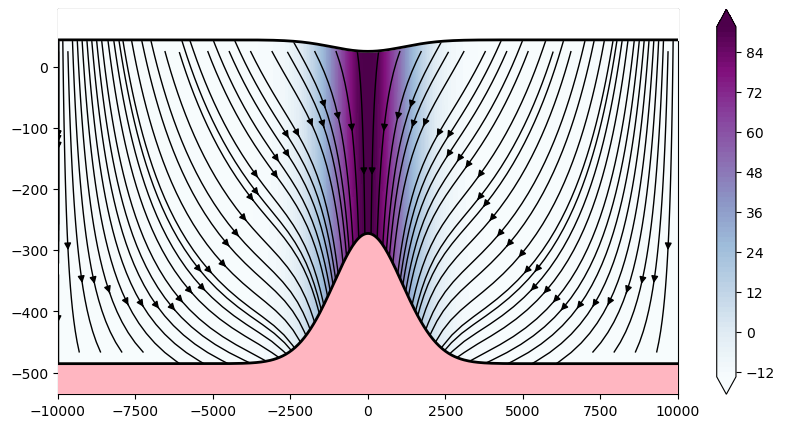

In [6]:
# timestep index for plotting 
i = -1

# ice thickness
H = np.interp(nodes_x, x[i,:], h[i,:])

# cryostatic pressure
p_cryo = rho_i*g*(H-nodes_z[i,:])

# triangulation of domain
triang = Triangulation(nodes_x,nodes_z[i,:],dofmap)

# interpolation for streamplot 
xi = np.linspace(nodes_x.min(), nodes_x.max(), 200)
zi = np.linspace(nodes_z[i,:].min(), nodes_z[i,:].max(), 200)
X, Z = np.meshgrid(xi, zi)
u_interp = griddata((nodes_x, nodes_z[i,:]), u[i,:]*3.154e7, (X, Z), method='linear')
w_interp = griddata((nodes_x, nodes_z[i,:]), w[i,:]*3.154e7, (X, Z), method='linear')
max_speed = np.nanmax(np.sqrt(u_interp**2 + w_interp**2))

pad = 50
plt.figure(figsize=(10,5))
c = plt.tricontourf(triang,(p[i,:]-p_cryo)/1e3,cmap='BuPu',levels=100,extend='both')
plt.streamplot(xi, zi, u_interp/max_speed, w_interp/max_speed, color='k', linewidth=1,broken_streamlines=False)

plt.fill_between(x[i,:],s[i,:]-10*pad,y2=s[i,:],facecolor='lightpink',zorder=100)
plt.fill_between(x[i,:],h[i,:],y2=h[i,:]+10*pad,color='w',zorder=100)
plt.plot(x[i,:],h[i,:],'k-',linewidth=2,zorder=101)
plt.plot(x[i,:],s[i,:],'k-',linewidth=2,zorder=101)
plt.ylim(s.min()-pad,h.max()+pad)
plt.xlim(x.min(),x.max())
plt.colorbar(c)
plt.show()
plt.close()